In [1]:
import json
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def load_json(file_path):
    with open(file_path, 'r') as file:
        Dt = json.load(file)
    return Dt

def load_age_epochs(Data, Key_name):
    Age_Epochs = []
    for i in Data:
        Age_Epochs.append(i[Key_name])
    return Age_Epochs

def class_labels():
    classes = [
        '<1700', 
        '1700-1749', 
        '1750-1799', 
        '1800-1819',
        '1820-1839',
        '1840-1859',
        '1860-1879',
        '1880-1899',
        '1900-1919',
        '1920-1939',
        '1940-1959',
        '1960-1979',
        '1980-1999',
        '2000-2019',
        '>2020'
        ]
    return classes

def convert_matrix_inplace(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if not isinstance(matrix[i][j], str): 
                matrix[i][j] = str(matrix[i][j])
    return matrix

def conf_matrix(ground_truth, pred_labels, classes):
    conf_matrix = confusion_matrix(ground_truth, pred_labels, labels=classes)
    conf_matrix = conf_matrix.astype(float)
    row_sums = conf_matrix.sum(axis=1)[:, np.newaxis]
    cm_percentage = np.divide(conf_matrix, row_sums, where=row_sums!=0) * 100
    rounded_cm_percentage = np.round(cm_percentage).astype(int)
    return rounded_cm_percentage

def adjusted_conf_matrix_3(conf_matrix):
    annot = np.array(conf_matrix, dtype='object')  

    conf_matrix[0, 1] = conf_matrix[0, 0]
    annot[0,1] = ''

    n = len(conf_matrix)

    for i in range(1, n-1):
        conf_matrix[i, i+1] = conf_matrix[i, i]
        annot[i, i+1] = ''
        conf_matrix[i, i-1] = conf_matrix[i, i]
        annot[i, i-1] = ''
    
    conf_matrix[n-1, n-2] = conf_matrix[n-1, n-1]    
    annot[n-1, n-2] = ''
    
    annot = convert_matrix_inplace(annot)
    return conf_matrix, annot

def adjusted_conf_matrix_5(conf_matrix):
    annot = np.array(conf_matrix, dtype='object')  

    conf_matrix[0, 1] = conf_matrix[0, 0]
    conf_matrix[0, 2] = conf_matrix[0, 0]
    annot[0,1] = ''
    annot[0,2] = ''

    conf_matrix[1, 0] = conf_matrix[1, 1]
    conf_matrix[1, 2] = conf_matrix[1, 1]
    conf_matrix[1, 3] = conf_matrix[1, 1]
    annot[1,0] = ''
    annot[1,2] = ''
    annot[1,3] = ''

    n = len(conf_matrix)

    for i in range(2, n-2):
        conf_matrix[i, i+1] = conf_matrix[i, i]
        conf_matrix[i, i+2] = conf_matrix[i, i]
        annot[i, i+1] = ''
        annot[i, i+2] = ''
        conf_matrix[i, i-1] = conf_matrix[i, i]
        conf_matrix[i, i-2] = conf_matrix[i, i]
        annot[i, i-1] = ''
        annot[i, i-2] = ''
    
    conf_matrix[n-2, n-1] = conf_matrix[n-2, n-2]
    conf_matrix[n-2, n-3] = conf_matrix[n-2, n-2]
    conf_matrix[n-2, n-4] = conf_matrix[n-2, n-2]    
    annot[n-2, n-1] = ''
    annot[n-2, n-3] = ''
    annot[n-2, n-4] = ''

    conf_matrix[n-1, n-2] = conf_matrix[n-1, n-1]
    conf_matrix[n-1, n-3] = conf_matrix[n-1, n-1]    
    annot[n-1, n-2] = ''
    annot[n-1, n-3] = ''

    annot = convert_matrix_inplace(annot)
    return conf_matrix, annot

def conf_matrix_plot(conf_matrix, classes, output_path, annot=True):
    matrix_str = convert_matrix_inplace(conf_matrix)
    plt.figure(figsize=(10, 7))
    # sns.heatmap(conf_matrix, annot=True, fmt=".0f", 
    #             cmap="Reds", xticklabels=classes, yticklabels=classes)
    sns.heatmap(matrix_str, annot=annot, fmt="",
                cmap="Greens", xticklabels=[], yticklabels=classes)
    # plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show

def adjusted_predictions_3(ground_truth, pred_labels, classes):
    adjusted_predictions = []
    for true_label, pred_label in zip(ground_truth, pred_labels):
        if pred_label == true_label:
            adjusted_predictions.append(pred_label)
        else:
            true_index = classes.index(true_label)
            if true_index > 0 and classes[true_index - 1] == pred_label:
                adjusted_predictions.append(true_label)
            elif true_index < len(classes) - 1 and classes[true_index + 1] == pred_label:
                adjusted_predictions.append(true_label)
            else:
                adjusted_predictions.append(pred_label)
    return adjusted_predictions

def adjusted_predictions_5(ground_truth, pred_labels, classes):
    adjusted_predictions = []
    for true_label, pred_label in zip(ground_truth, pred_labels):
        if pred_label == true_label:
            adjusted_predictions.append(pred_label)
        else:
            true_index = classes.index(true_label)
            if true_index > 0 and classes[true_index - 1] == pred_label:
                adjusted_predictions.append(true_label)
            elif true_index > 1 and classes[true_index - 2] == pred_label:
                adjusted_predictions.append(true_label)
            elif true_index < len(classes) - 1 and classes[true_index + 1] == pred_label:
                adjusted_predictions.append(true_label)            
            elif true_index < len(classes) - 2 and classes[true_index + 2] == pred_label:
                adjusted_predictions.append(true_label)
            else:
                adjusted_predictions.append(pred_label)
    return adjusted_predictions

In [5]:
true_data = load_json("./Building_Attribute.json")['Data']
pred_result = load_json("./predicted_result.json")
ground_truth = load_age_epochs(true_data, "Age Epoch")
pred_labels = load_age_epochs(pred_result, "age")
output_path_normal = './conf_matrix/cm_normal.png'
output_path_3 = './conf_matrix/cm_3.png'
output_path_5 = './conf_matrix/cm_5.png'

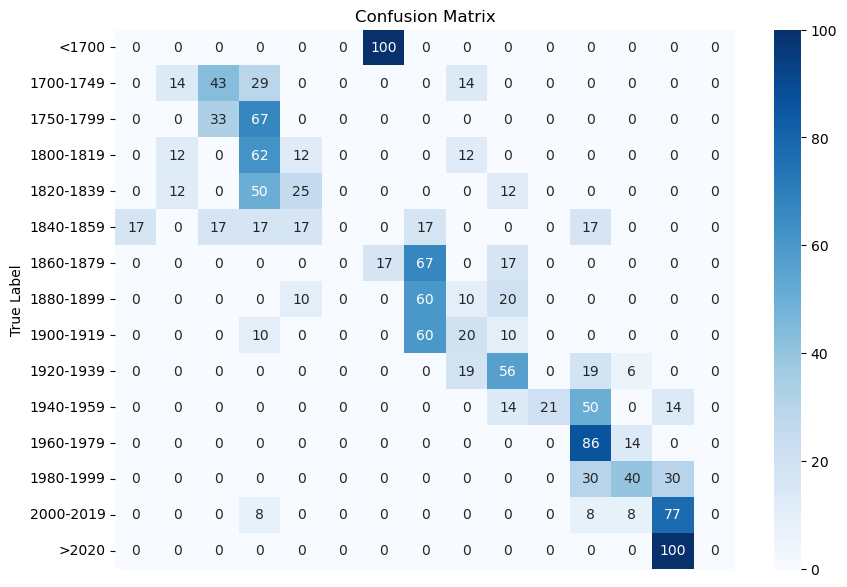

In [8]:
conf_matrix_normal = conf_matrix(ground_truth, pred_labels, class_labels())
conf_matrix_plot_normal = conf_matrix_plot(conf_matrix_normal, class_labels(), output_path_normal)

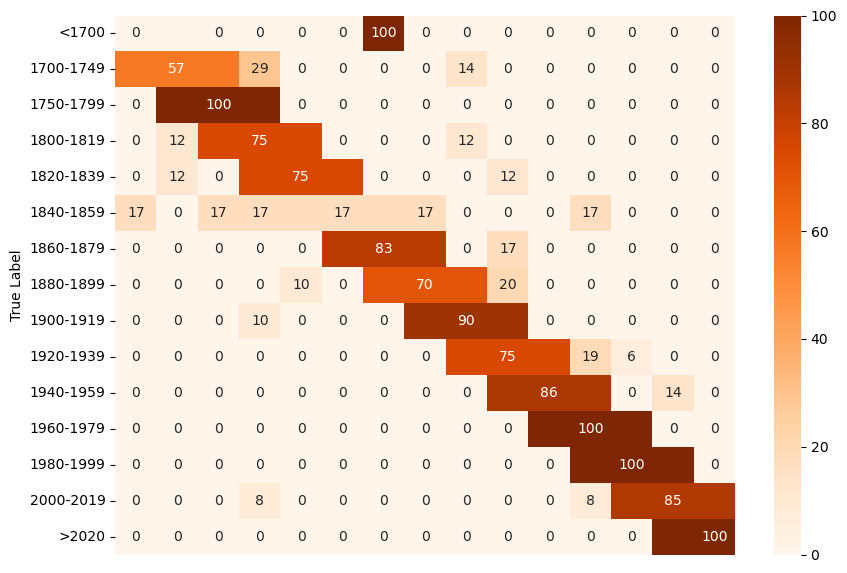

In [10]:
conf_matrix_3 = conf_matrix(ground_truth, adjusted_predictions_3(ground_truth, pred_labels, class_labels()), class_labels())
adjusted_conf_matrix_33, annot = adjusted_conf_matrix_3(conf_matrix_3)
conf_matrix_plot_3 = conf_matrix_plot(adjusted_conf_matrix_33, class_labels(), output_path_normal, annot)

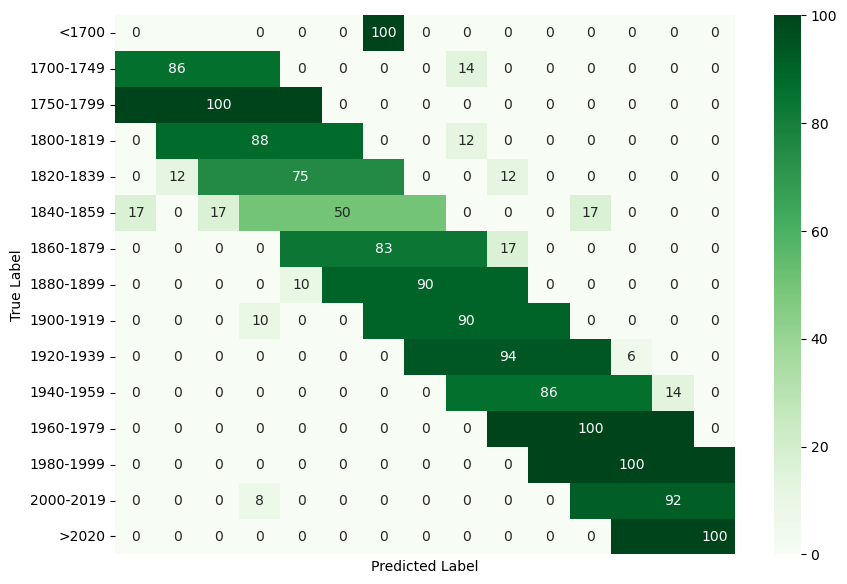

In [12]:
conf_matrix_5 = conf_matrix(ground_truth, adjusted_predictions_5(ground_truth, pred_labels, class_labels()), class_labels())
adjusted_conf_matrix_55, annot = adjusted_conf_matrix_5(conf_matrix_5)
conf_matrix_plot_5 = conf_matrix_plot(adjusted_conf_matrix_55, class_labels(), output_path_normal, annot)

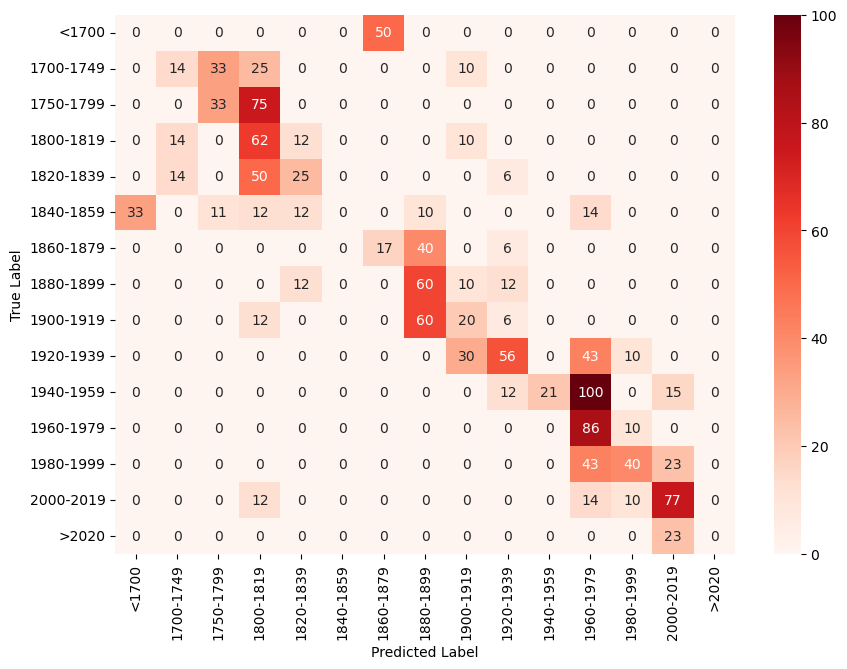

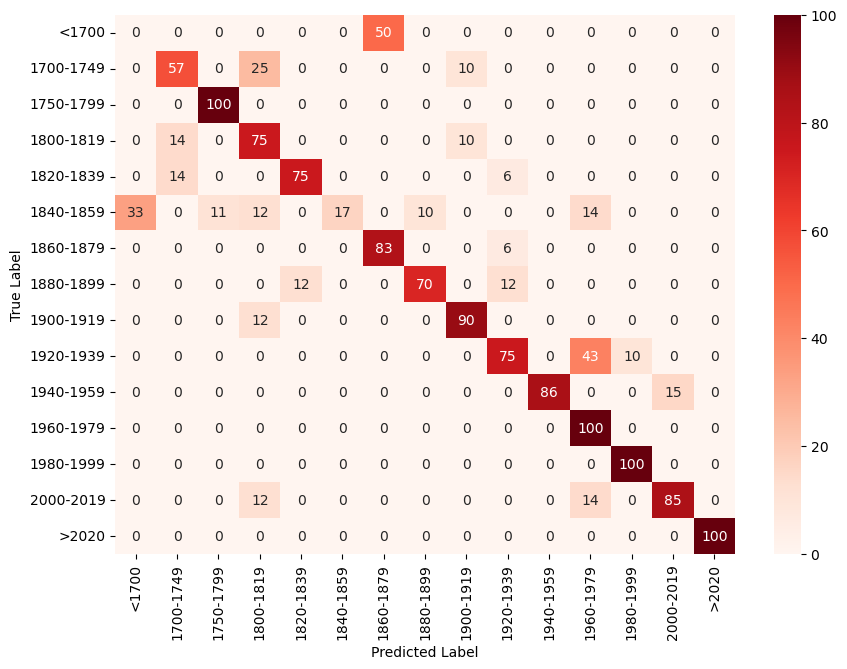

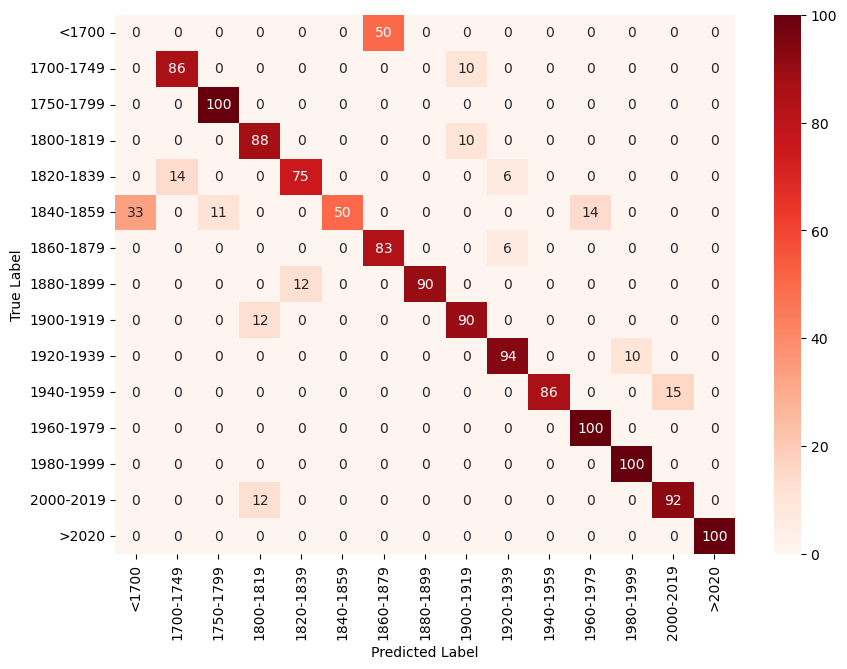

In [21]:
conf_matrix(ground_truth, pred_labels, classes(), output_path_normal)
conf_matrix(ground_truth, adjusted_predictions_3(ground_truth, pred_labels, classes()), classes(), output_path_3)
conf_matrix(ground_truth, adjusted_predictions_5(ground_truth, pred_labels, classes()), classes(), output_path_5)